# *Libraries*

In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# CONFIGURATION

NO_CAT = 7

# *Prepare Datasets*

In [3]:
BASE_DIR = '/kaggle/input/classify-president-topic-satria-data-sf'

if NO_CAT == 1:
    DIR_1 = f"{BASE_DIR}/classify_president_cat_1_topic_p1/classify_president_cat_1_topic.csv"
    DIR_2 = f"{BASE_DIR}/classify_president_cat_1_topic_p2/classify_president_cat_1_topic.csv"
else:
    DIR = f"{BASE_DIR}/classify_president_cat_{NO_CAT}_topic/classify_president_cat_{NO_CAT}_topic.csv"

In [4]:
if NO_CAT == 1:
    df_1 = pd.read_csv(DIR_1)
    df_2 = pd.read_csv(DIR_2)
    df = pd.concat([df_1,df_2]).reset_index(drop=True)
else:
    df = pd.read_csv(DIR)

# *Extract Required Information*

In [5]:
def extract_retweet_from(text):
    retweet_from = re.findall(r'\[re (\S+)\]', text)
    return retweet_from[0] if retweet_from else None

In [6]:
df['retweet_from'] = df['content'].apply(extract_retweet_from)

In [7]:
edges_df = df[['retweet_from','topic']]
edges_df = edges_df.rename(columns={'retweet_from': 'source','topic': 'target'})
edges_df = edges_df.dropna()
edges_df.head()

,source,target
0,catchmeupid,-1
5,asa_mrsy,0
6,gus_raharjo,2
7,aniesmania,1
9,cagubnyinyir2,1


In [8]:
edges_df = edges_df[edges_df['target'] != -1]
target_list = sorted(edges_df['target'].unique().tolist())

# *Analysis*

In [9]:
def get_graph_visualization(edges_df,target):
    target_edges_df = edges_df[edges_df['target'] == target]
    target_edges_df = target_edges_df.groupby(['source'],as_index=False).count()
    target_edges_df.columns = ['source','edge_width']
    target_edges_df['target'] = target
    target_edges_df = target_edges_df.sort_values(by='edge_width',ascending=False)[:20]
    total_edges = target_edges_df['edge_width'].sum()
    
    G = nx.from_pandas_edgelist(target_edges_df, 'target', 'source')

    plt.figure(figsize=(20, 20))
    l = nx.star_graph(G)
    pos = nx.spring_layout(l, seed=42) 
    options = {
        "node_color": "khaki",
        "edge_color": "brown",
        "width": (target_edges_df.edge_width/total_edges) * 50,
        "edge_cmap": plt.cm.Blues,
        "with_labels": True,
        "node_size": 8200,
        "font_size": 10
    }
    nx.draw(l,pos,**options)
    plt.show()

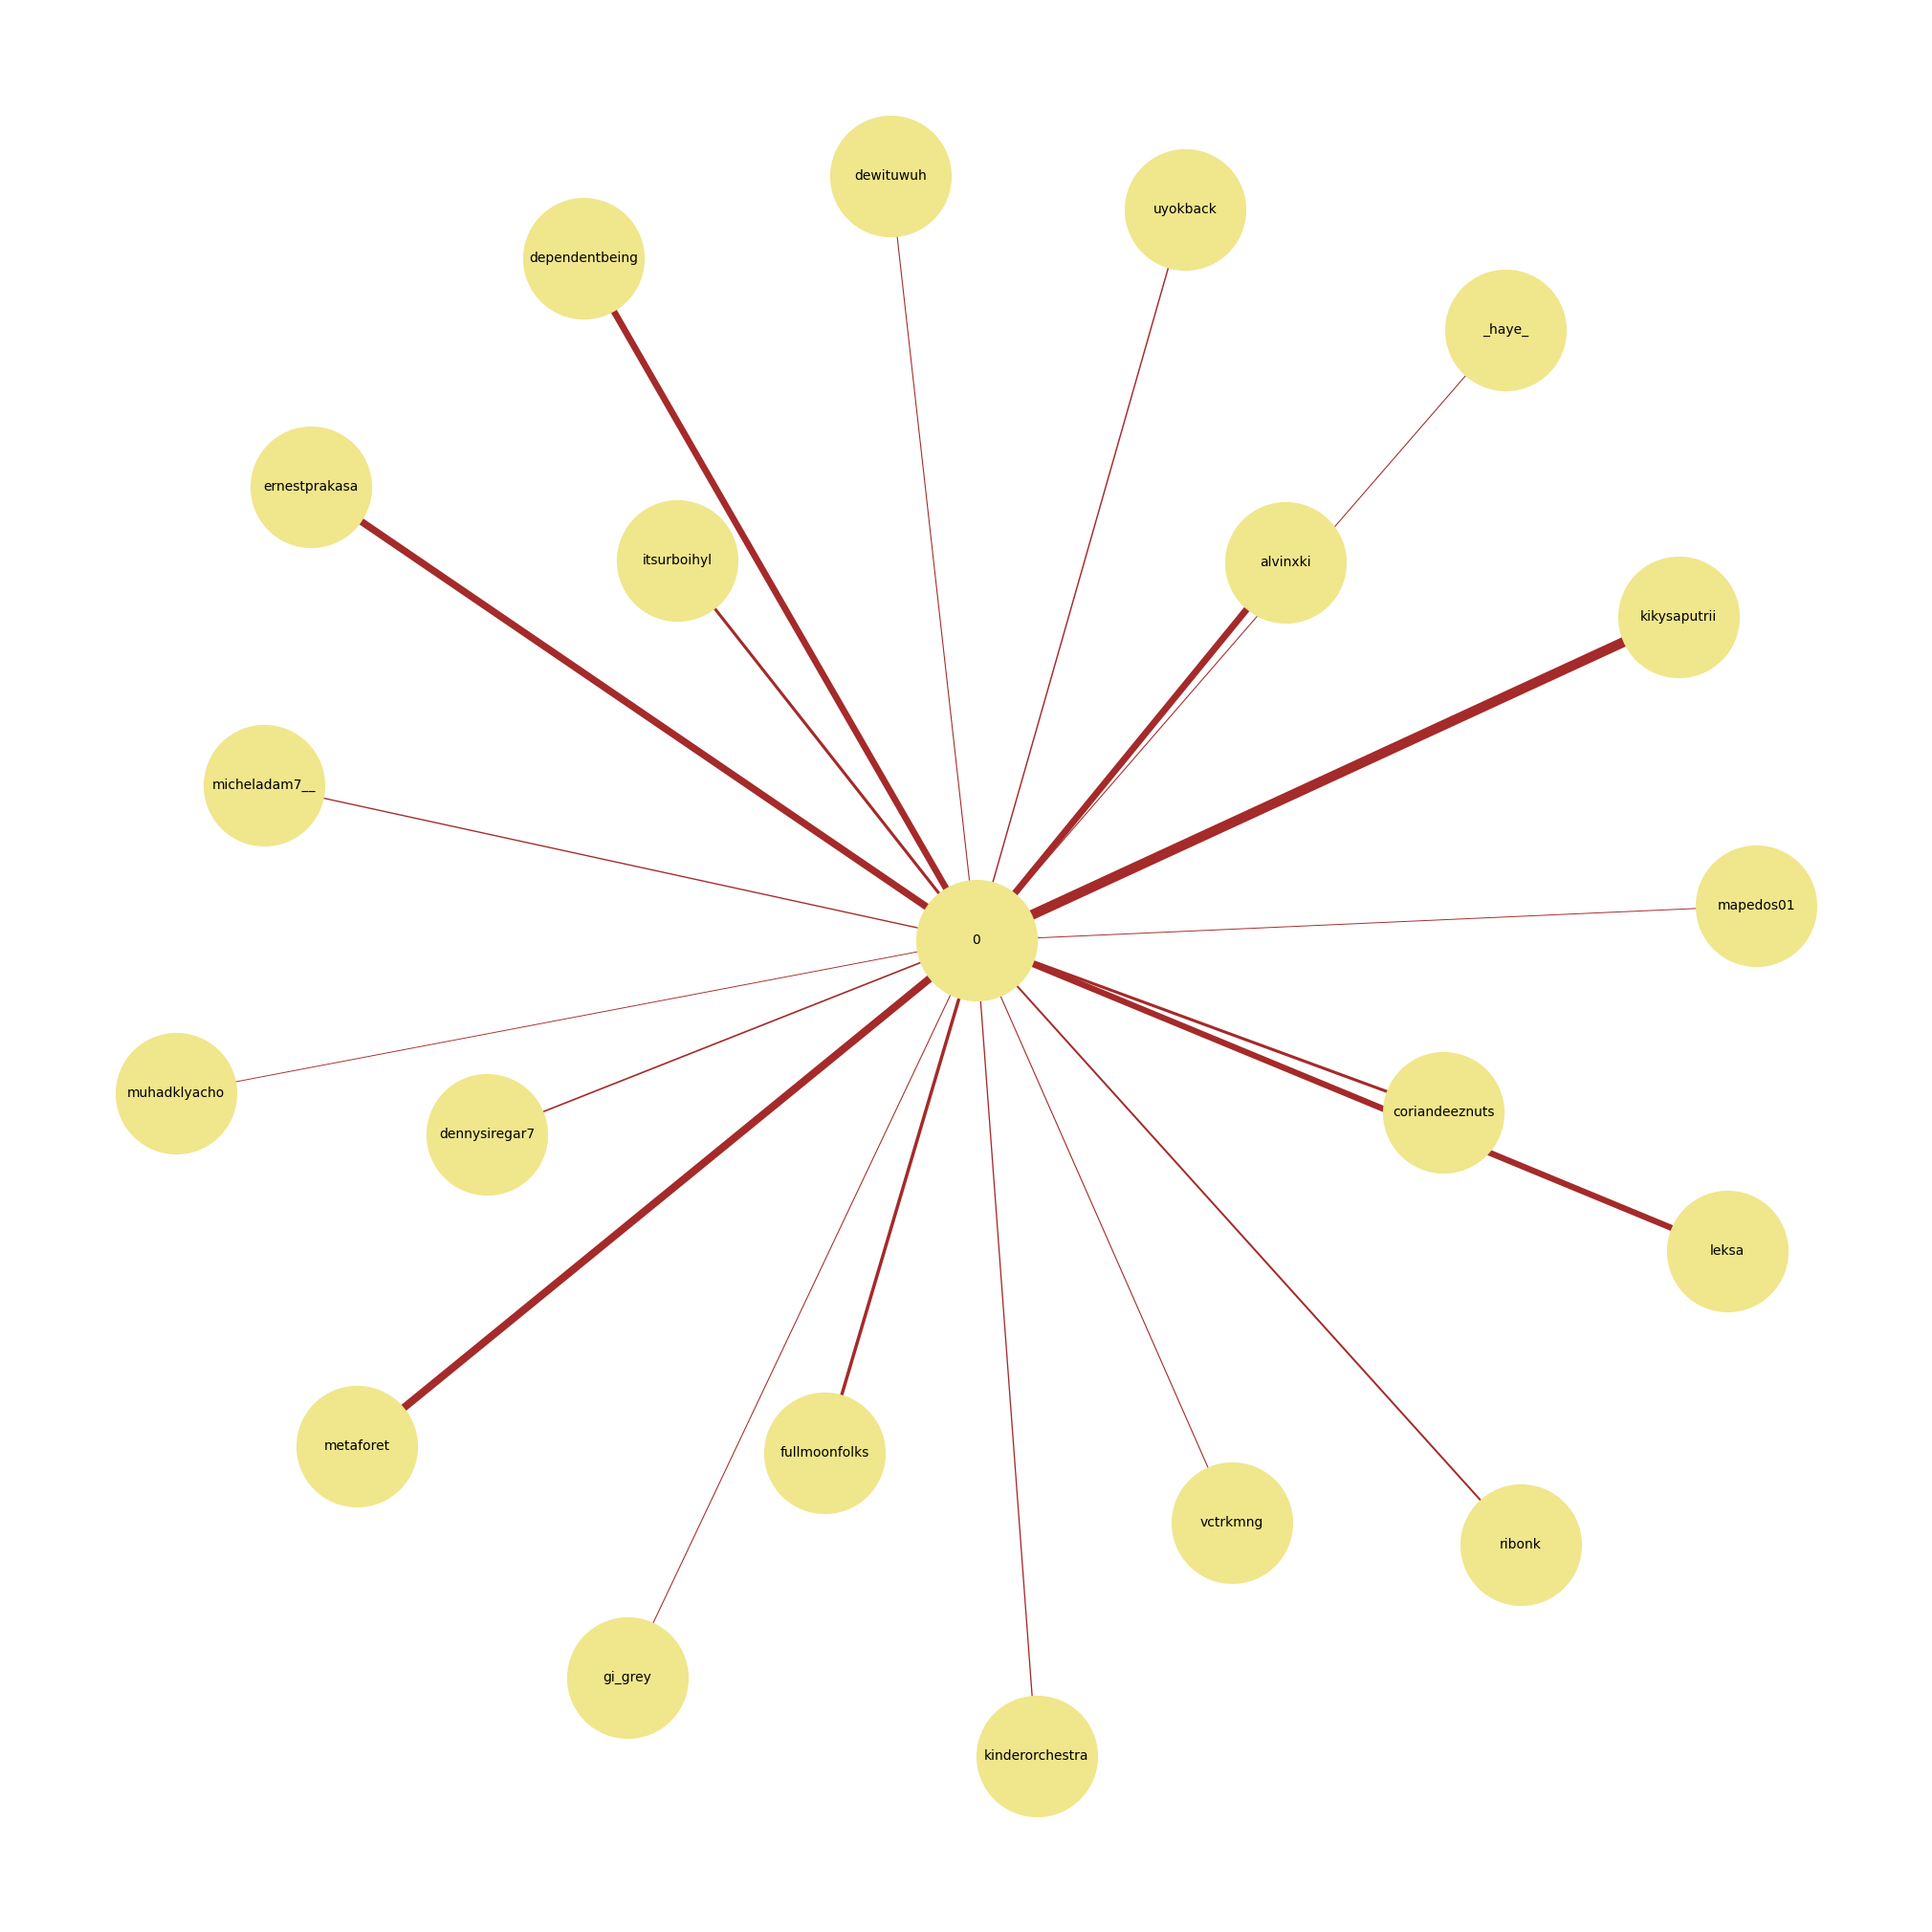

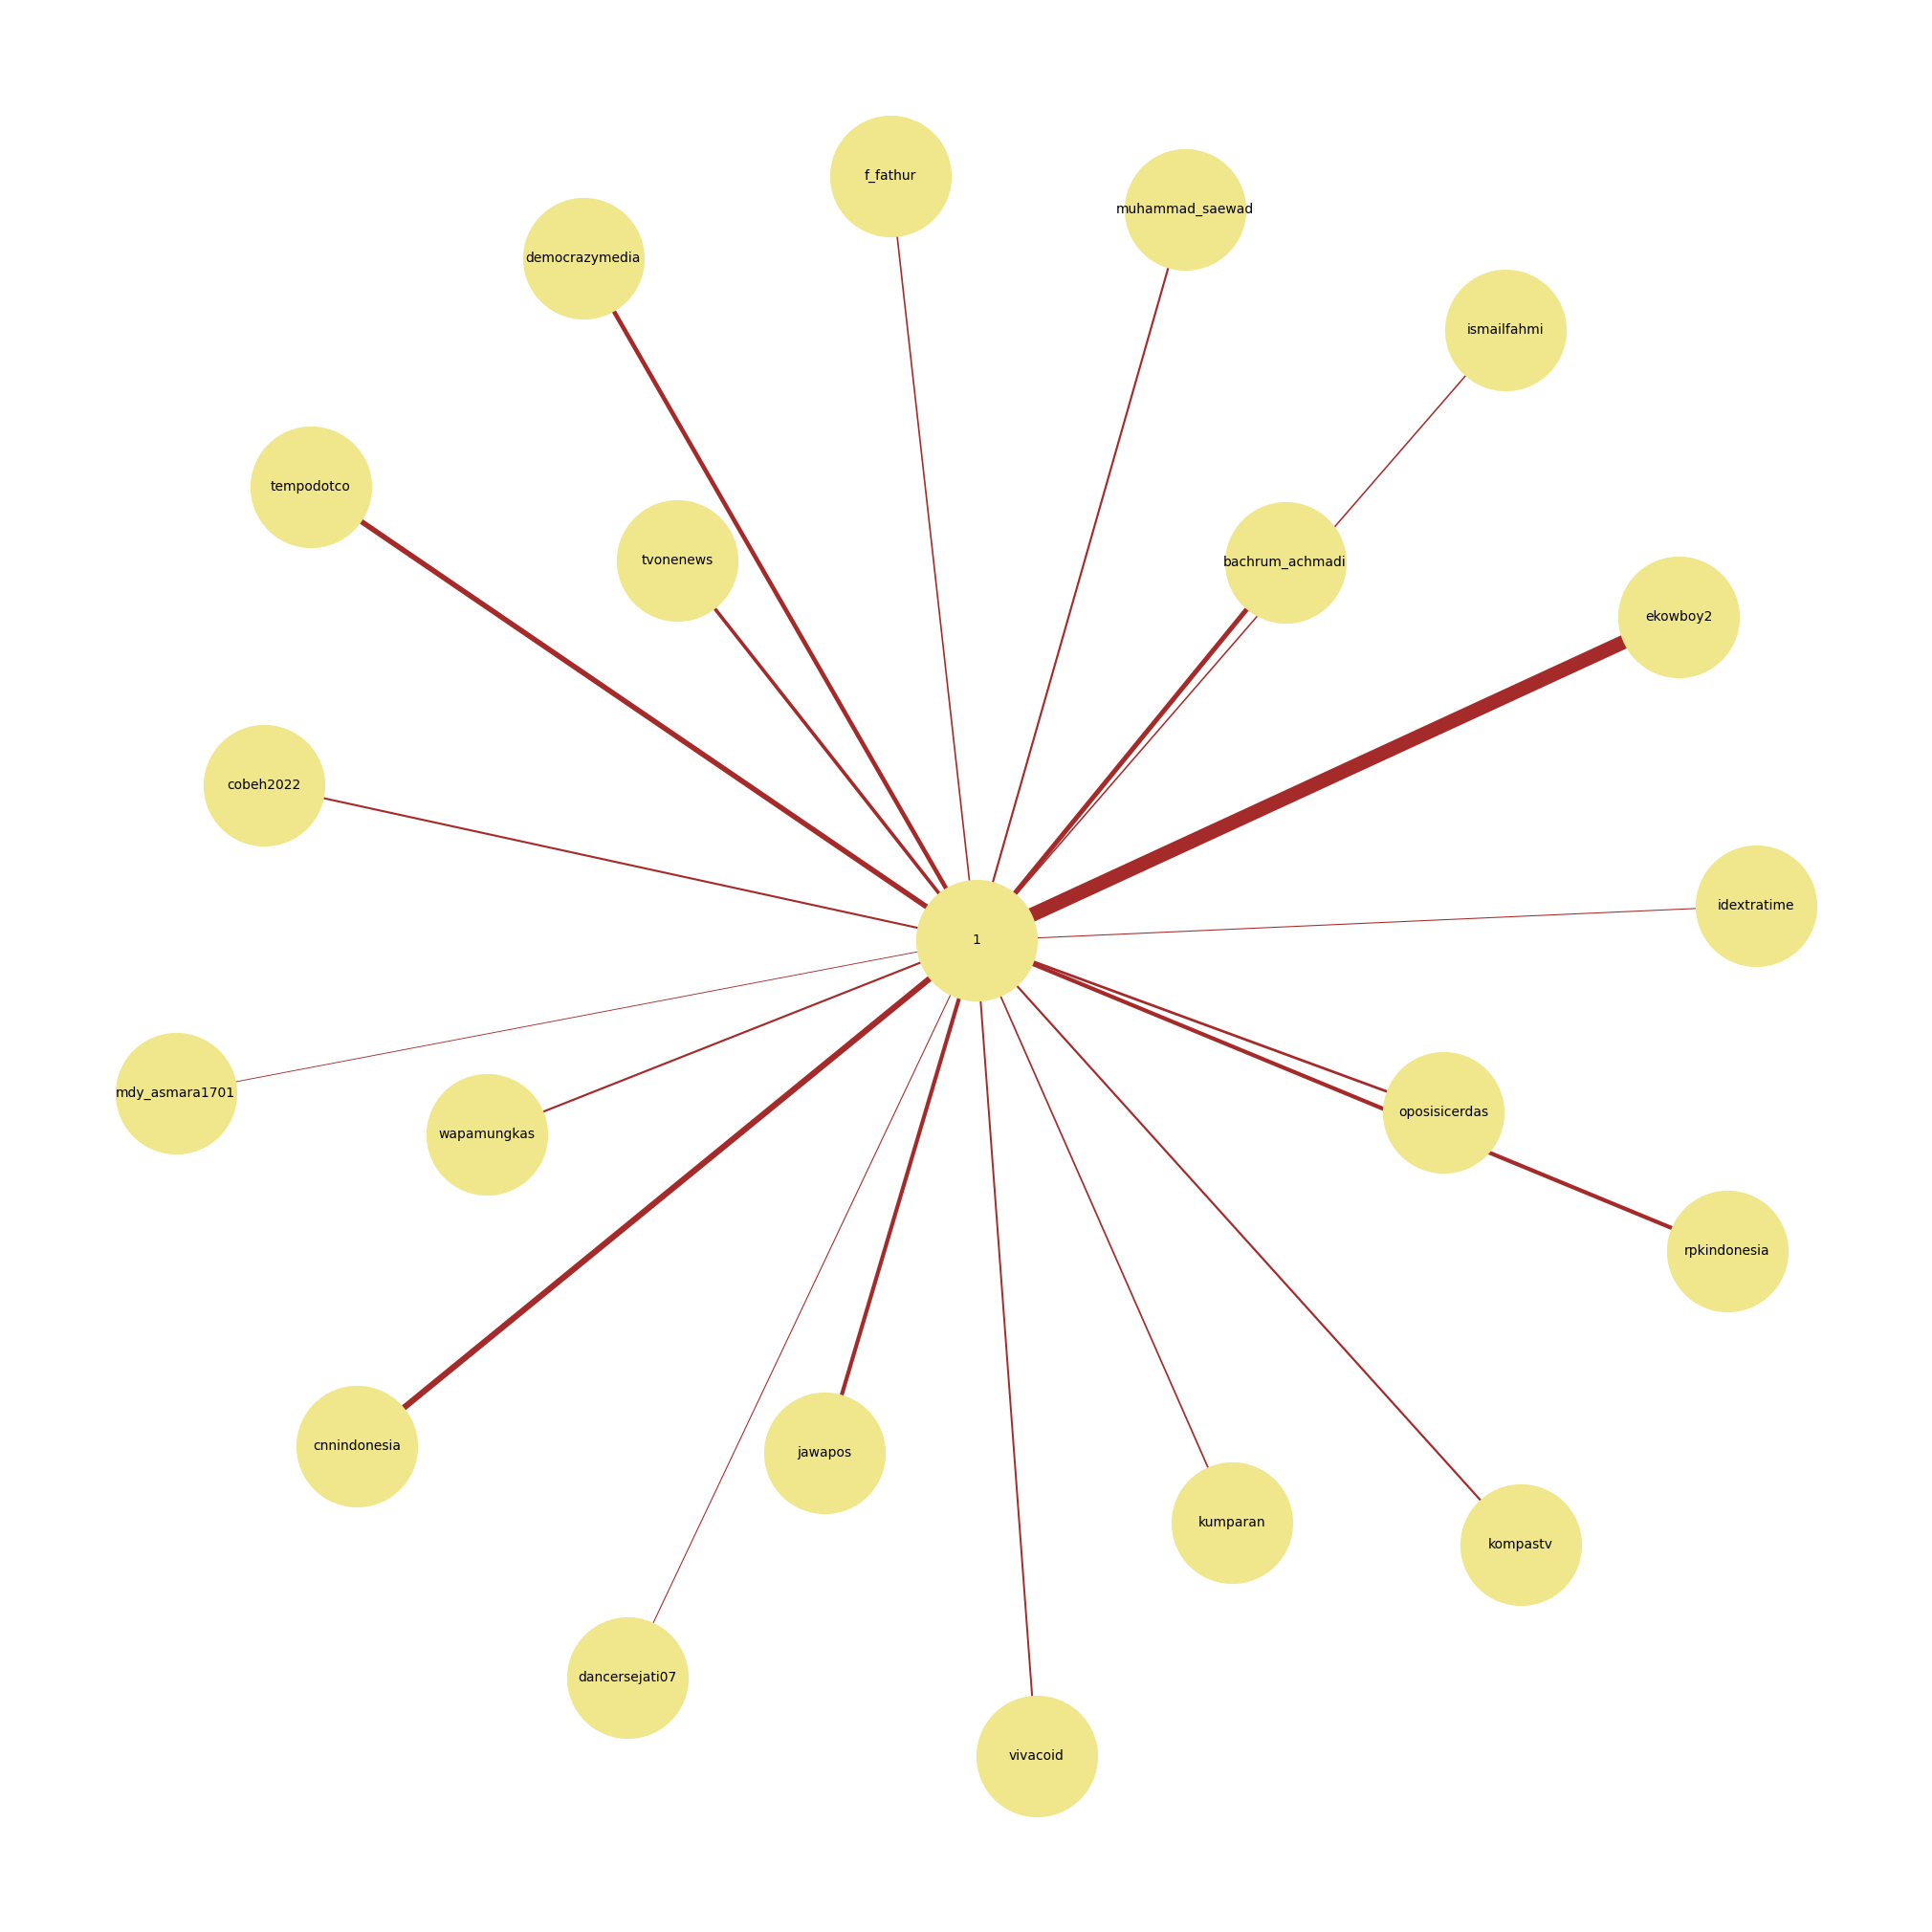

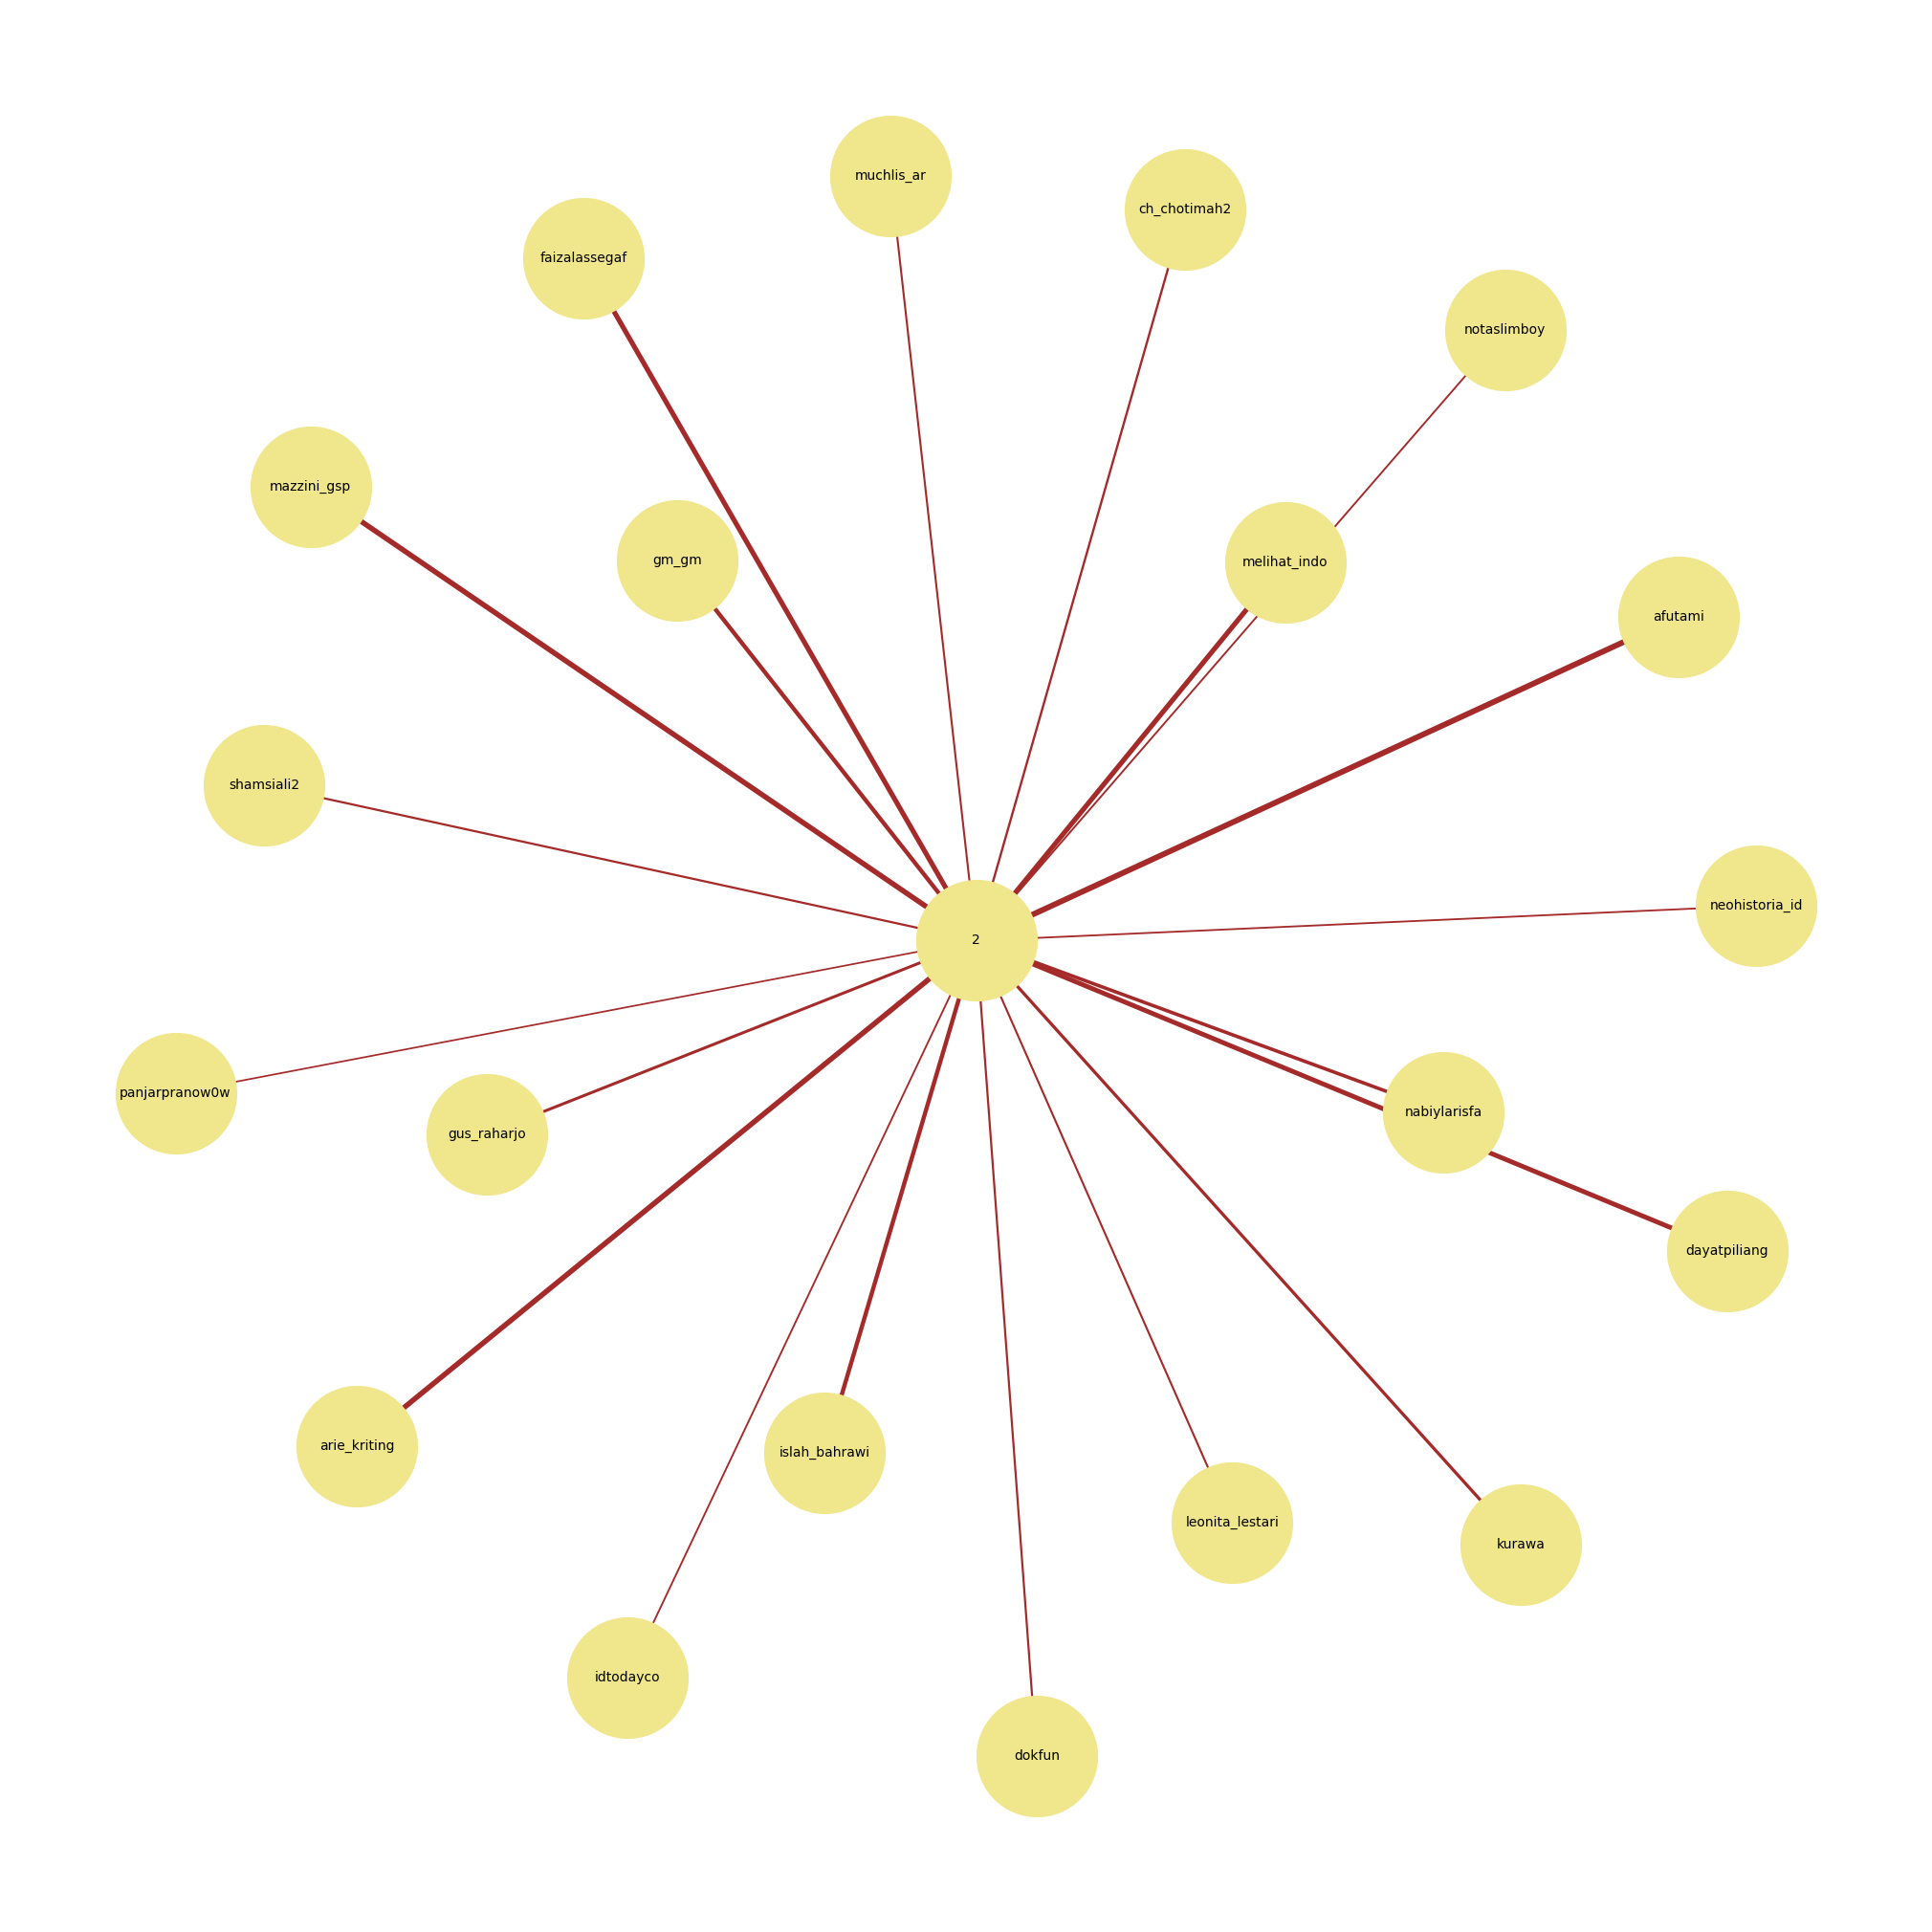

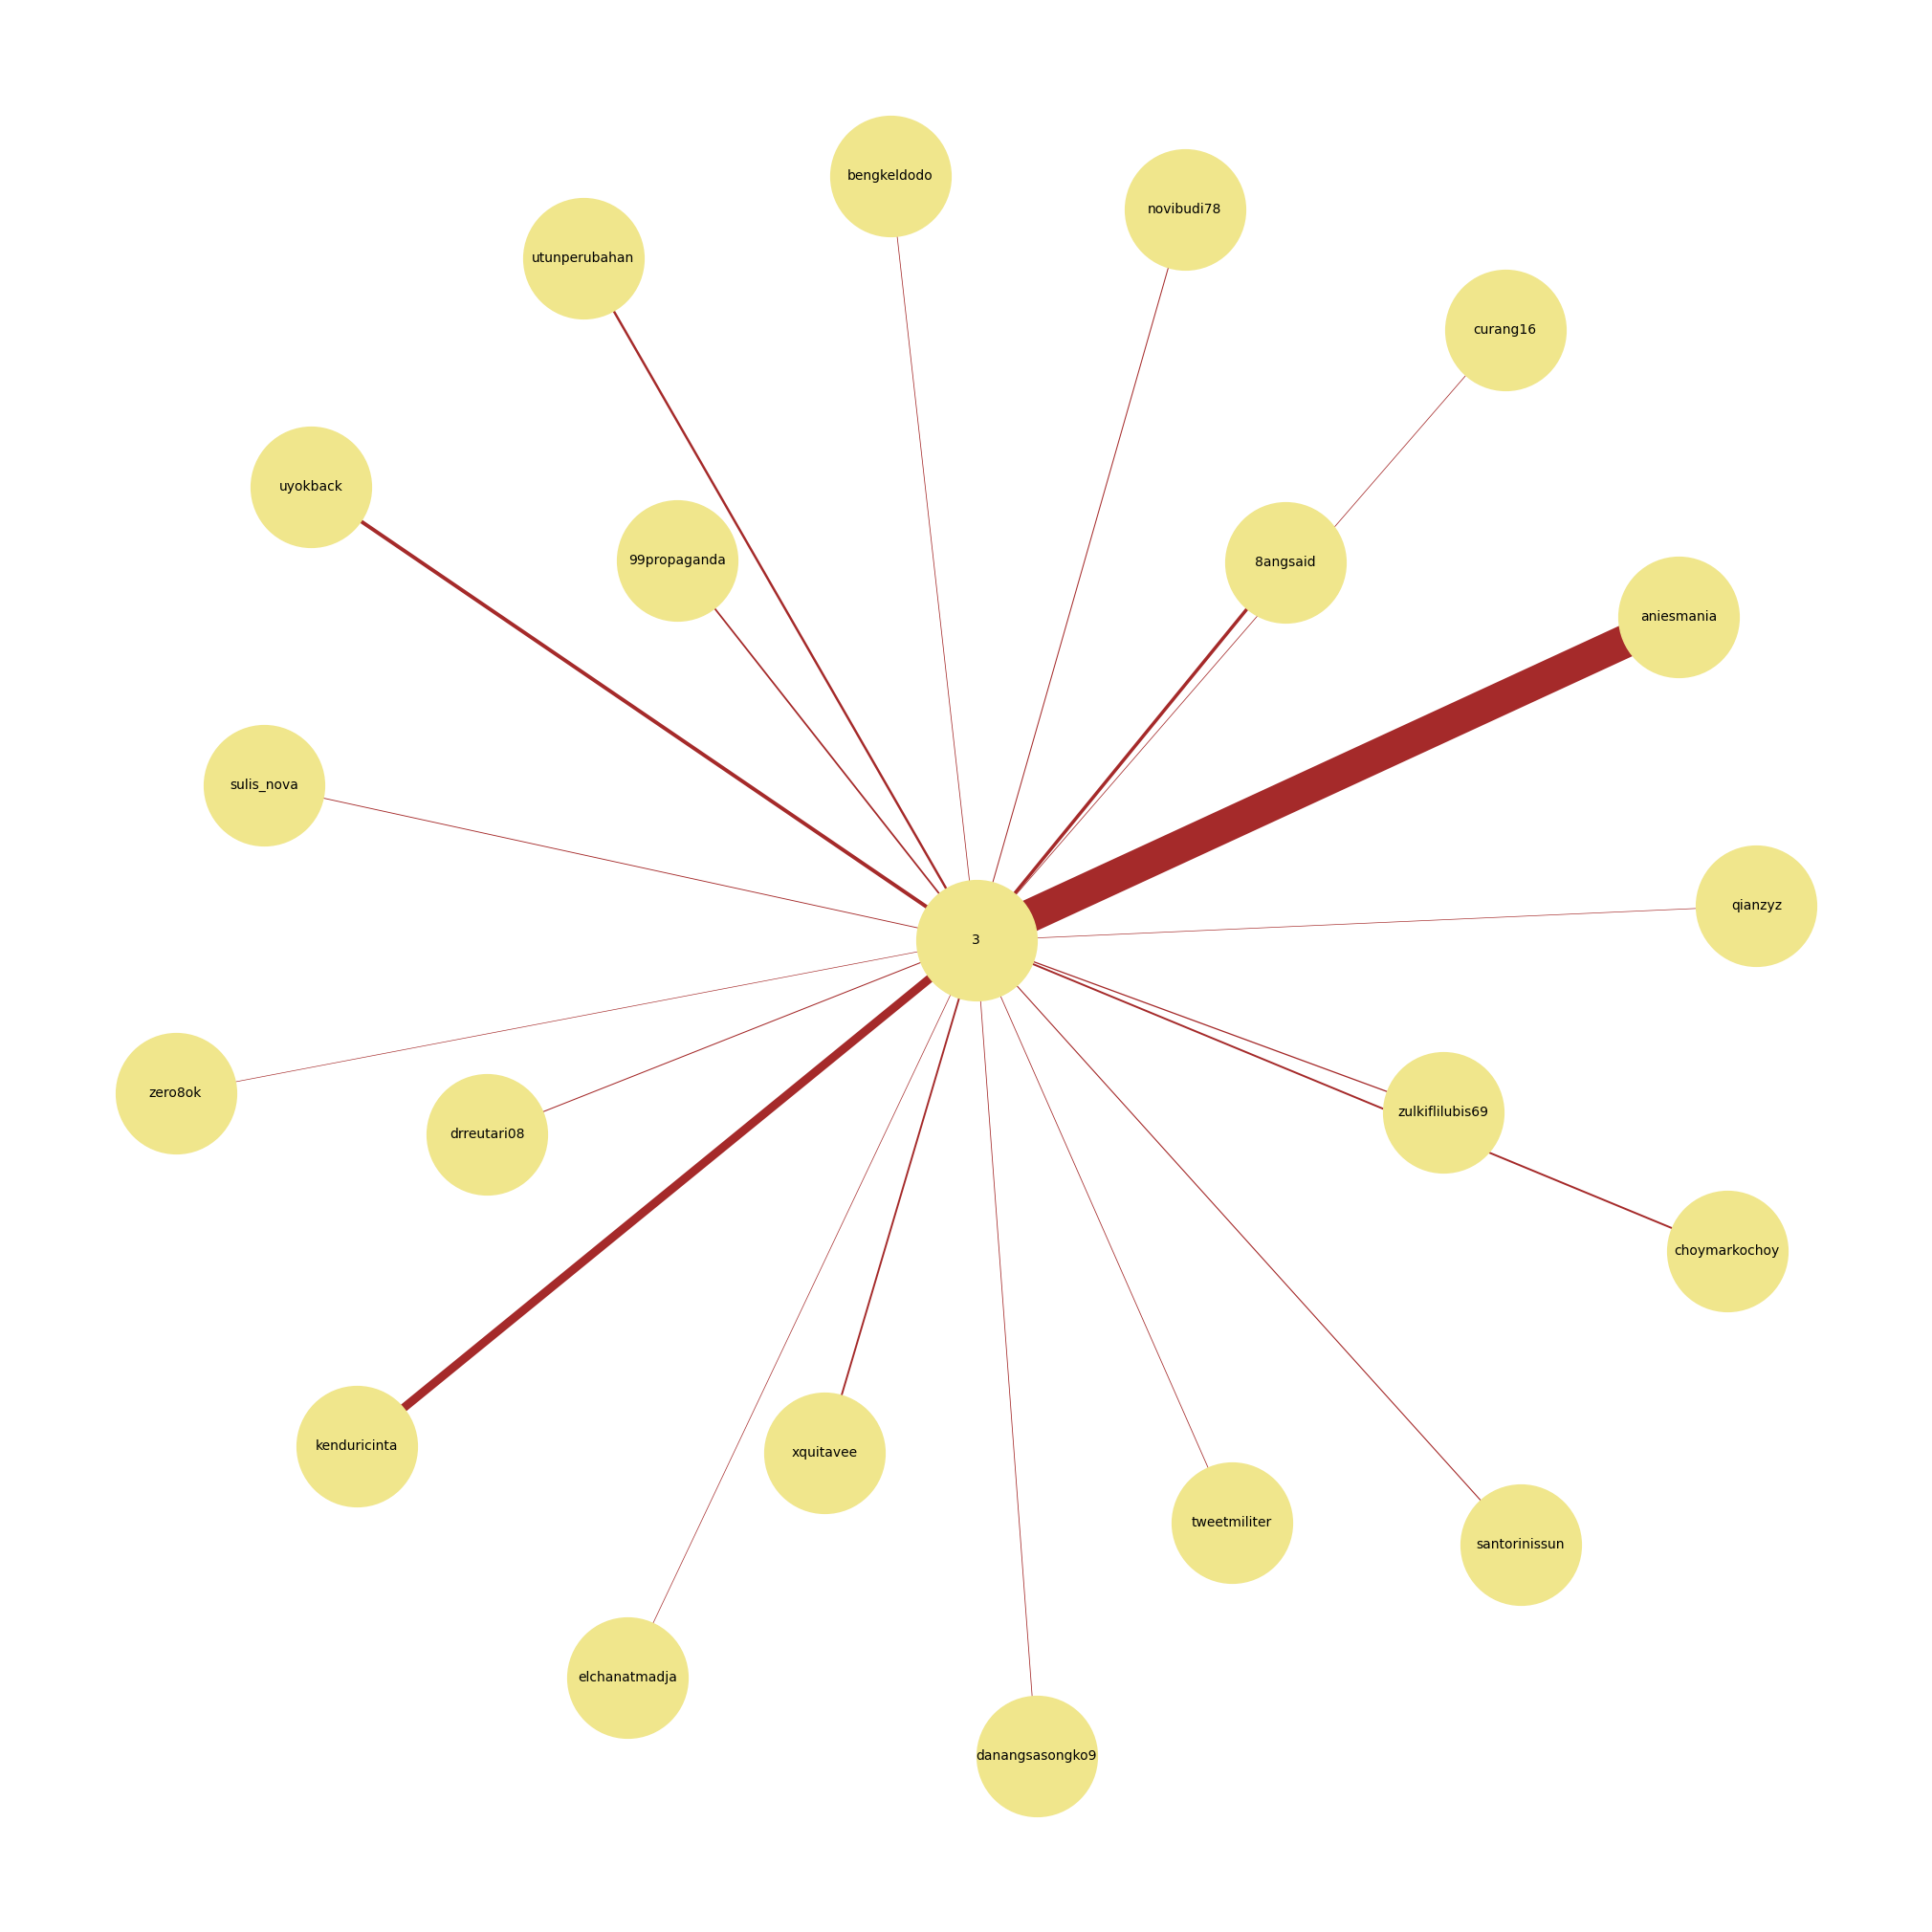

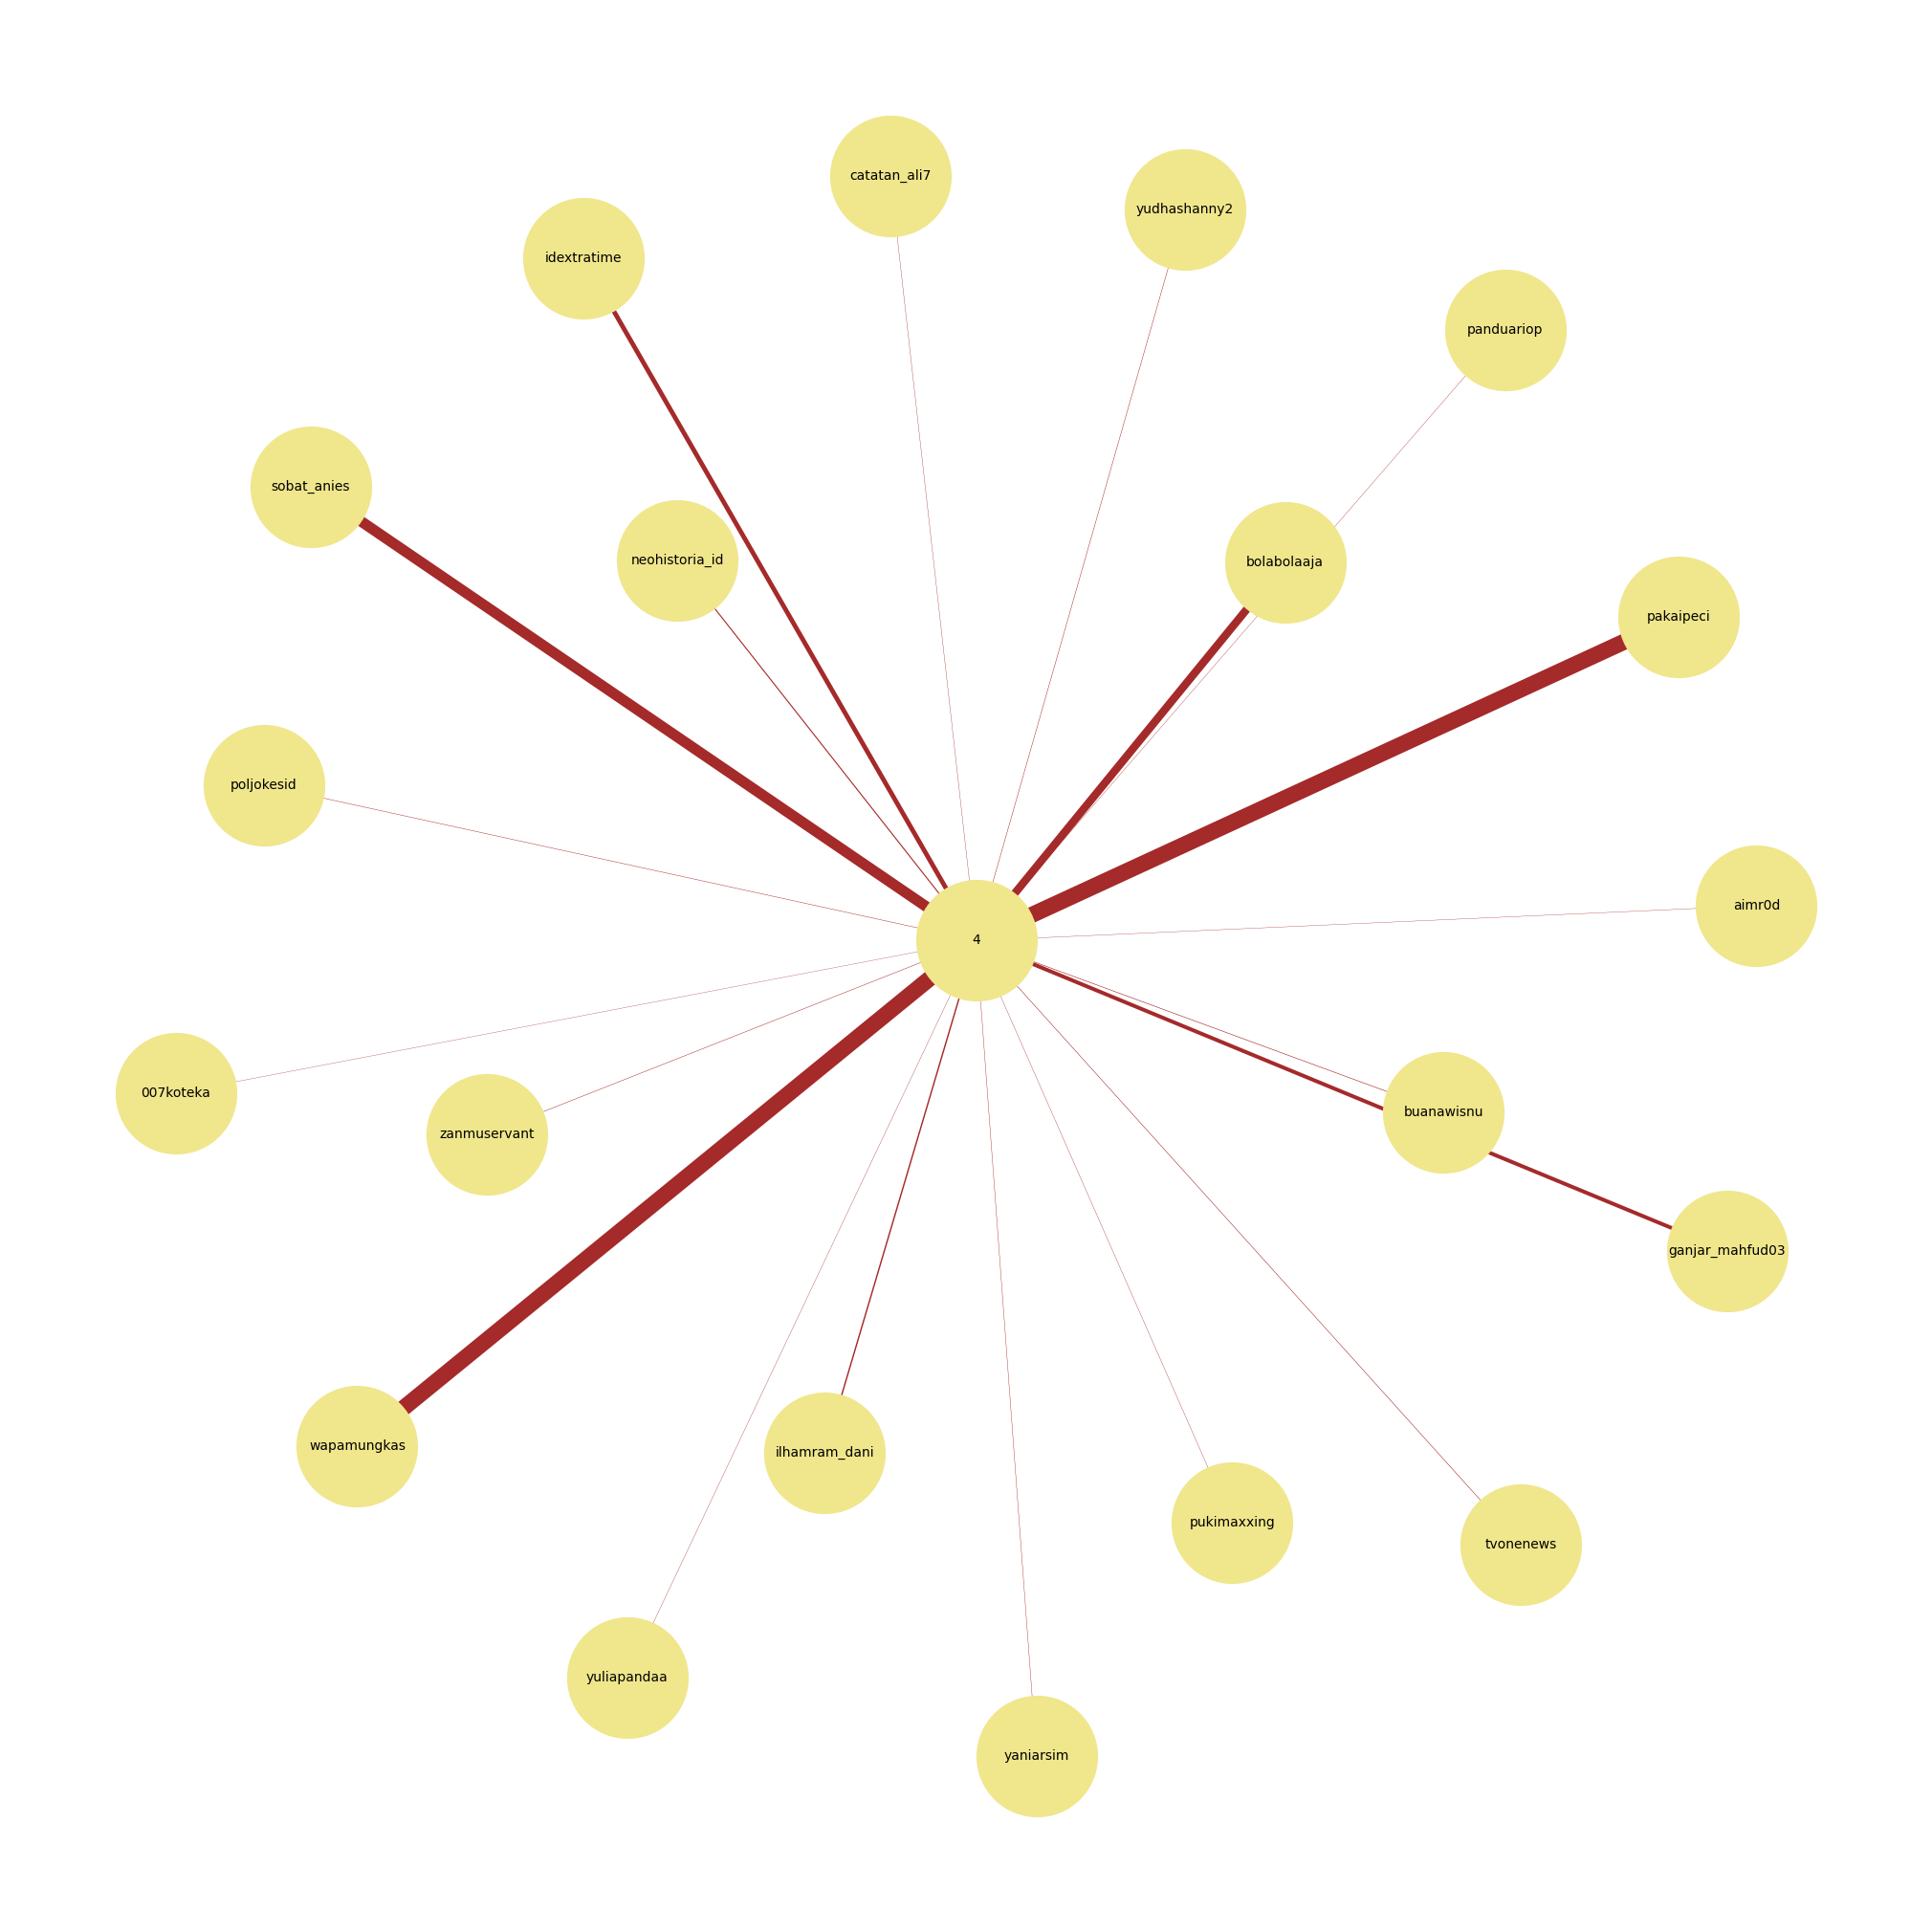

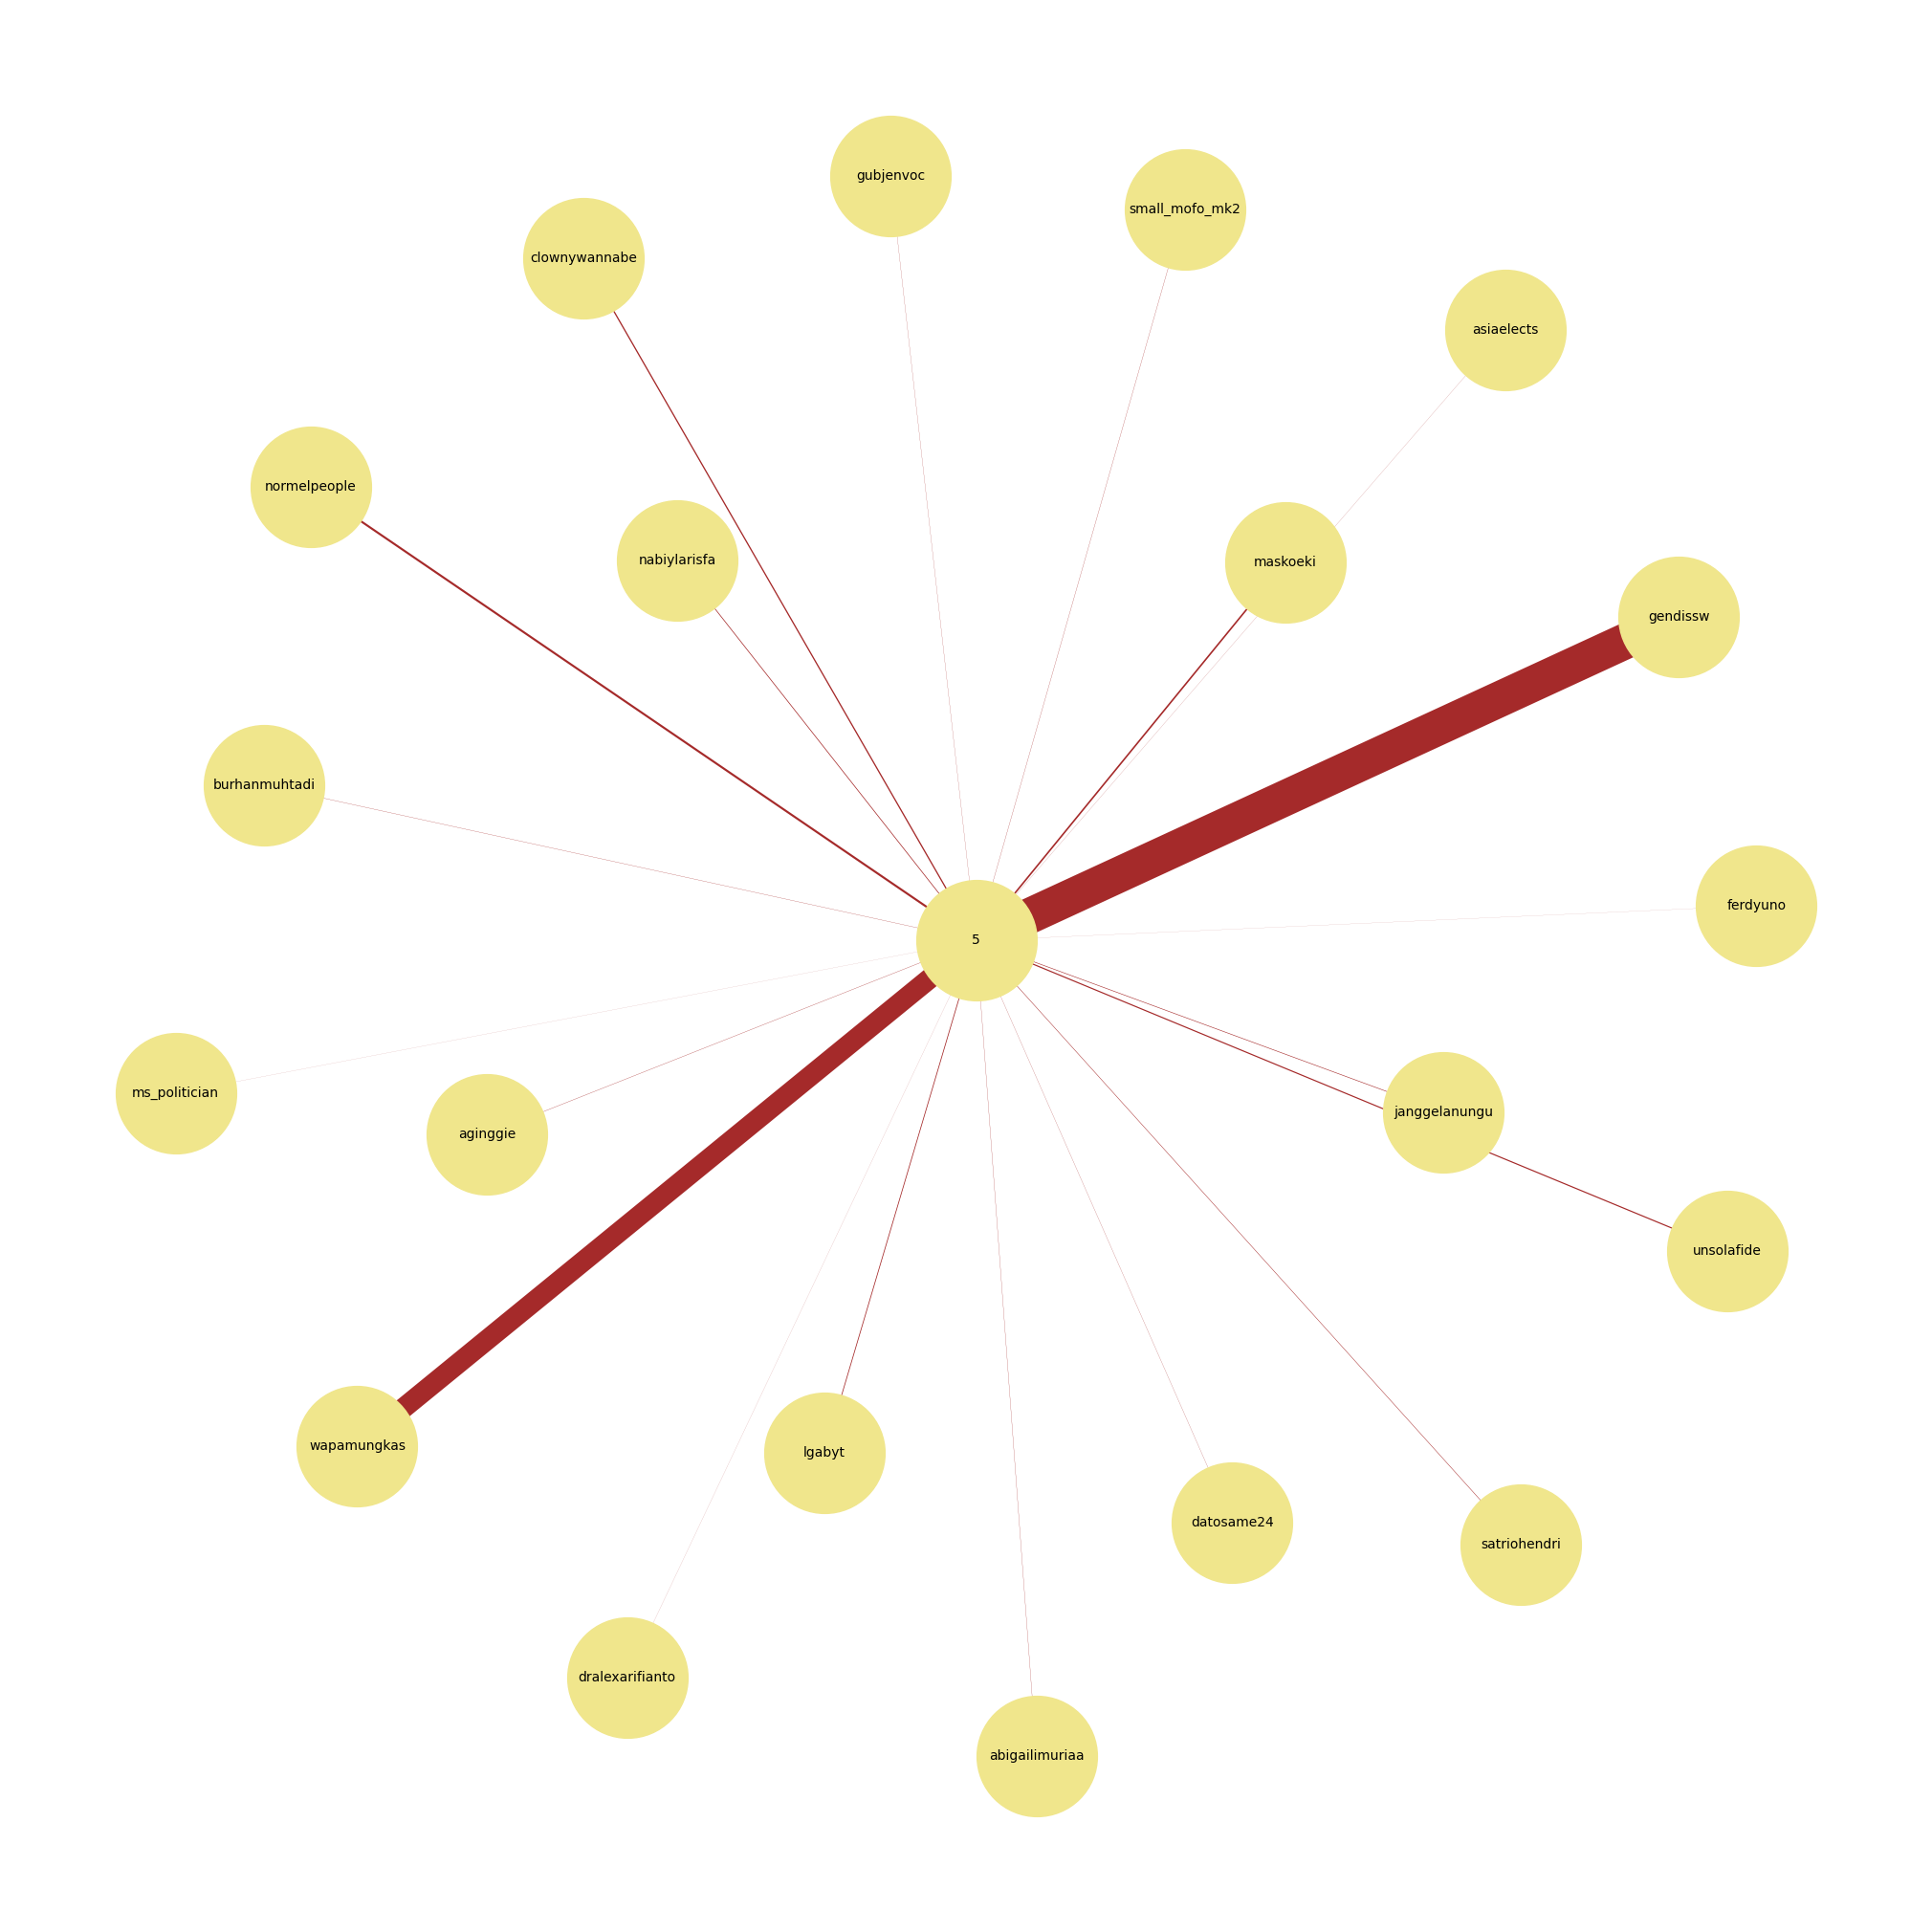

In [10]:
for target in target_list:
    get_graph_visualization(edges_df,target)